# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Since the new format of the SAT exam was introduced in 2016, SAT exam participation rate have fluctuated in 2017 and 2018. Some states have decided to introduced statewide participation of ACT exam while there are other states that do not participate in the SAT exams. To further promote the new SAT exam to states in the US, I seek to find out some of the factors that are influencing SAT participation rates statewide and suggest ways to improve SAT participation rates for a state of interest.

## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [986]:
#Imports:

# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing seaborn.
import seaborn as sns


# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Generate plots within the Jupyter notebook.
%matplotlib inline

In [987]:
# Run all nodes interactively
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [988]:
#Code:
df_sat_2017 = pd.read_csv("../data/sat_2017.csv")
df_act_2017 = pd.read_csv("../data/act_2017.csv")
sat_2017 = pd.DataFrame(df_sat_2017)
act_2017 = pd.DataFrame(df_act_2017)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [989]:
#Code:
sat_2017.head(10)
act_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
sat_2017 shows the 2017 SAT participation rate, mean score of each test category and the total mean score for each state.

act_2017 shows the 2017 ACT participation rate, mean score of each test category and the total mean score (composite) for each state.

#### 4a. Does the data look complete? 

In [990]:
#Using shape to find dimensions of the Dataframe and isnull().value_counts() to sum all values which are non-nulls.
#Compare the total non-null values with the row dimension of the dataframe.
sat_2017.shape
sat_2017.isnull().value_counts()
act_2017.shape
act_2017.isnull().value_counts()

(51, 5)

State  Participation  Evidence-Based Reading and Writing  Math   Total
False  False          False                               False  False    51
dtype: int64

(52, 7)

State  Participation  English  Math   Reading  Science  Composite
False  False          False    False  False    False    False        52
dtype: int64

Answer: Based on both dataframes, the data looks complete as there are 50 states in the US and both dataframe 
        have at least 50 rows. Also, both dataframes do not have missing or null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
For sat_2017,the maximum score for each test is 800 and the minimum score for each exam is 200.

For act_2017, the maximum score for each test is 36 and the minimum score for each exam is 1. 

Maryland SAT 2017 mean Math score seems unusually low and below the minimum threshold of the minimum exam score.

Maryland ACT 2017 mean Science score seems unusually low and does not match up with its own composite score.

In [991]:
sat_2017
act_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [992]:
#rectification from offical scores
#for ACT official results located at this page:-
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

sat_2017.iloc[20, 3] = 524
act_2017.iloc[21, 5] = 23.1

#### 5. What are your data types? 
Display the data types of each feature. 

In [993]:
#code
sat_2017.dtypes
act_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

The data type from the "Participation" column is a float and not a string. The participation rate is based on percentage values which are type-convertible to a float or integer. The percentage sign can be removed to convert the data type to integer or float without significantly altering the original dataset provided.

The composite number, describing the average of the 4 test scores in the ACT exam, the values under this column should be a float and not a string. This was due to the cell from the last row which contained a character 'x'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [994]:
#code
def convert_type(i):
    i = i.strip('%')
    i = float(i)
    return i    

In [995]:
#creating second function to convert data type to float in a dataframe.
def convert_type2(i):
    i = float(i)
    return i  

- Fix any individual values preventing other columns from being the appropriate type.

In [996]:
#replacing the columns with the functions applied
sat_2017['Participation'] = sat_2017['Participation'].map(convert_type)
act_2017['Participation'] = act_2017['Participation'].map(convert_type)
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].map(convert_type2)
sat_2017['Math'] = sat_2017['Math'].map(convert_type2)
sat_2017['Total'] = sat_2017['Total'].map(convert_type2)

In [997]:
# removing 'x' from the values of the 'Composite' column and changing the type to float.
act_2017['Composite'] = act_2017['Composite'].str.replace('x', '').map(convert_type2)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [998]:
#code
sat_2017.tail()
act_2017.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65.0,561.0,541.0,1102.0
47,Washington,64.0,541.0,534.0,1075.0
48,West Virginia,14.0,558.0,528.0,1086.0
49,Wisconsin,3.0,642.0,649.0,1291.0
50,Wyoming,3.0,626.0,604.0,1230.0


,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


- Display the data types again to confirm they are correct.

In [999]:
#Code:
sat_2017.dtypes
act_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [1000]:
sat_2017.columns
act_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [1001]:
#replacing column names in the dataframe.
sat_2017.columns = ['state', 's17_part', 's17_ebrw', 's17_math', 's17_total']
act_2017.columns = ['state', 'a17_part', 'a17_eng', 'a17_math', 'a17_read', 'a17_sci', 'a17_comp']
#checking for the column names
sat_2017.head(3)
act_2017.head(3)

,state,s17_part,s17_ebrw,s17_math,s17_total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0


,state,a17_part,a17_eng,a17_math,a17_read,a17_sci,a17_comp
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|




|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### 8. Data dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*string*|sat_2017, sat_2018, act_2017, act_2018|The name of the state in the United States.| 
|**s17_part**|*float*|sat_2017|The participation rate of each state in SAT 2017 exam (units calculated in percentage)| 
|**s17_ebrw**|*float*|sat_2017|The mean score result for each state in the SAT 2017 Evidence-Based Reading and Writing exam.| 
|**s17_math**|*float*|sat_2017|The mean score result for each state in the SAT 2017 Math exam.| 
|**s17_total**|*float*|sat_2017|The mean total SAT score for each state in the SAT 2017 exam.| 
|**s18_part**|*float*|sat_2018|The participation rate for each state in SAT 2018 exam (units calculated in percentage)| 
|**s18_ebrw**|*float*|sat_2018|The mean score result for each state in the SAT 2018 Evidence-Based Reading and Writing exam.| 
|**s18_math**|*float*|sat_2018|The mean score result for each state in the SAT 2018 Math exam.| 
|**s18_total**|*float*|sat_2018|The mean total SAT score for each state in the SAT 2018 exam.| 
|**a17_part**|*float*|act_2017|The participation rate for each state in ACT 2017 exam (units calculated in percentage)| 
|**a17_eng**|*float*|act_2017|The mean score for each state in the ACT 2017 English exam.| 
|**a17_math**|*float*|act_2017|The mean score for each state in the ACT 2017 Math exam.| 
|**a17_read**|*float*|act_2017|The mean score for each state in the ACT 2017 Reading exam.| 
|**a17_sci**|*float*|act_2017|The mean score for each state in the ACT 2017 Science exam.| 
|**a17_comp**|*float*|act_2017|The Composite score is the average of the four test scores(English, Maths, Reading, Science) in each state for the ACT 2017 exam.| 
|**a18_part**|*float*|act_2018|The participation rate for each state in ACT 2018 exam (units calculated in percentage)| 
|**a18_eng**|*float*|act_2018|The mean score for each state in the ACT 2018 English exam.| 
|**a18_math**|*float*|act_2018|The mean score for each state in the ACT 2018 Math exam.| 
|**a18_read**|*float*|act_2018|The mean score for each state in the ACT 2018 Reading exam.| 
|**a18_sci**|*float*|act_2018|The mean score for each state in the ACT 2018 Science exam.| 
|**a18_comp**|*float*|act_2018|The Composite score is the average of the four test scores(English, Maths, Reading, science) in each state for the ACT 2018 exam.| 



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [1002]:
#code: to drop 'national' row from act_2017
act_2017 = act_2017.drop(0)

In [1003]:
#check the dataframe after previous action
act_2017.head(3)

,state,a17_part,a17_eng,a17_math,a17_read,a17_sci,a17_comp
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [1004]:
#Code:
# merging dataframes on column 'state'
combined_2017 = pd.merge(sat_2017, act_2017, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [1005]:
#code
# saving data in the relative folder
export_path = r"../data/combined_2017.csv"
combined_2017.to_csv(export_path)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [1006]:
#importing data files from location, convert both data.csv files into dataframes for analysis.
#renaming file names for consistency.

df_sat_2018 = pd.read_csv("../data/sat_2018.csv")
df_act_2018 = pd.read_csv("../data/act_2018_updated.csv")
sat_2018 = pd.DataFrame(df_sat_2018)
act_2018 = pd.DataFrame(df_act_2018)

In [1007]:
#changing column types to float for consistency using previously defined functions. (convert_type and convert_type2)
sat_2018['Participation'] = sat_2018['Participation'].map(convert_type)
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].map(convert_type2)
sat_2018['Math'] = sat_2018['Math'].map(convert_type2)
sat_2018['Total'] = sat_2018['Total'].map(convert_type2)
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].map(convert_type2)

In [1008]:
#replacing column names in the dataframe.
sat_2018.columns = ['state', 's18_part', 's18_ebrw', 's18_math', 's18_total']
act_2018.columns = ['state', 'a18_part', 'a18_comp', 'a18_eng', 'a18_math', 'a18_read', 'a18_sci']

In [1009]:
#check for dtype and any null values.
sat_2018.info()
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      51 non-null     object 
 1   s18_part   51 non-null     float64
 2   s18_ebrw   51 non-null     float64
 3   s18_math   51 non-null     float64
 4   s18_total  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     51 non-null     object 
 1   a18_part  51 non-null     float64
 2   a18_comp  51 non-null     float64
 3   a18_eng   51 non-null     float64
 4   a18_math  51 non-null     float64
 5   a18_read  51 non-null     float64
 6   a18_sci   51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [1010]:
combined_2018 = pd.merge(sat_2018, act_2018, on='state')
export_path = r"../data/combined_2018.csv"
combined_2018.to_csv(export_path)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [1011]:
df = pd.merge(combined_2017, combined_2018, on='state')
export_path = r"../data/final.csv"
df.to_csv(export_path)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1012]:
#Code:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
s17_part,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
s17_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
s17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
s17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
a17_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
a17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
a17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
a17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
a17_sci,51.0,21.449020,1.737397,18.2,19.95,21.3,23.15,24.9
a17_comp,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

Source code from stackoverflow. [Author: asenga Date and time: Mar 19 '19 at 10:49](https://stackoverflow.com/questions/36830737/writing-a-standard-deviation-function)

In [1013]:
#source code from https://stackoverflow.com/questions/36830737/writing-a-standard-deviation-function
# author: asenga,
# date: Mar 19 '19
# time: 10:49
x = []
def std_dev(x):
    try:
        summation = 0
        for i in x: summation += ((i - sum(x)/len(x))**2)  
        return ((summation/(len(x)))**0.5) #ddof = 0
    except:
        pass

In [1014]:
#testing std_dev function
std_dev(df['a18_sci'])

1.8516885484833543

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [1015]:
#Code:
sd = {key: std_dev(value) for key, value in df.items()}
sd

{'state': None,
 's17_part': 34.92907076664508,
 's17_ebrw': 45.21697020437866,
 's17_math': 46.65713364485503,
 's17_total': 91.58351056778743,
 'a17_part': 31.824175751231806,
 'a17_eng': 2.3304876369363363,
 'a17_math': 1.9624620273436781,
 'a17_read': 2.0469029314842646,
 'a17_sci': 1.7202795656314875,
 'a17_comp': 2.000786081581989,
 's18_part': 36.946619223539415,
 's18_ebrw': 47.03460978357609,
 's18_math': 47.30194550378352,
 's18_total': 93.22742384464433,
 'a18_part': 33.745194881997506,
 'a18_comp': 2.0855261815801147,
 'a18_eng': 2.4222536143202795,
 'a18_math': 2.015707255555717,
 'a18_read': 2.145891884510421,
 'a18_sci': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [1016]:
# sd from pandas
df['a18_sci'].describe()

count    51.000000
mean     21.345098
std       1.870114
min      17.900000
25%      19.850000
50%      21.100000
75%      23.050000
max      24.900000
Name: a18_sci, dtype: float64

In [1017]:
#sd from numpy
np.std(df['a18_sci'])

1.8516885484833543

The manually calculated standard deviation matches the output from numpy.
However, it does not match the output from pandas.

Based on numpy API reference:
"In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate of the standard deviation per se."

[Numpy API](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

It is likely that the standard deviation output from pandas have included ddof = 1. Since we are using population of known variance, we should use the standard deviation output from numpy.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1018]:
df[['state', 's17_total', 's18_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
s17_total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0
s18_total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


In [1019]:
#for 2017 SAT highest and lowest participation rate.
df[['state', 's17_part']].sort_values(by=['s17_part'], ascending=False).head()
df[['state', 's17_part']].sort_values(by=['s17_part'], ascending=False).tail()                                                                    

,state,s17_part
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


,state,s17_part
3,Arkansas,3.0
50,Wyoming,3.0
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0


The states with the highest participation rate of 100% for the SAT 2017 exam are District of Columbia, Michigan, Connecticut and Delaware. (4 states)

The states with the lowest participation rate of 2% for the SAT 2017 exam are North Dakota, Mississippi and Iowa.
(3 states)

In [1020]:
#for 2018 SAT highest and lowest participation rate.
df[['state', 's18_part']].sort_values(by=['s18_part'], ascending=False).head(6)
df[['state', 's18_part']].sort_values(by=['s18_part'], ascending=False).tail() 

,state,s18_part
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0


,state,s18_part
24,Mississippi,3.0
15,Iowa,3.0
49,Wisconsin,3.0
50,Wyoming,3.0
34,North Dakota,2.0


The states with the highest participation rate of 100% for the SAT 2018 exam are Colorado, Connecticut, Delaware, Michigan and Idaho. (5 states)

The state with the lowest participation rate of 2% for the SAT 2018 exam is North Dakota. (1 state)

In [1021]:
#for 2017 ACT highest and lowest participation rate.
df[['state', 'a17_part']].sort_values(by=['a17_part'], ascending=False).head(18)
df[['state', 'a17_part']].sort_values(by=['a17_part'], ascending=False).tail()

,state,a17_part
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


,state,a17_part
38,Pennsylvania,23.0
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


The states with the highest participation rate of 100% for the ACT 2017 exam are Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana,
Missouri, Wyoming, Colorado	and Arkansas. (17 states)

The state with the lowest participation rate of 8% for the ACT 2017 exam is Maine. (1 state) 

In [1022]:
#for 2018 ACT highest and lowest participation rate.
df[['state', 'a18_part']].sort_values(by=['a18_part'], ascending=False).head(18)
df[['state', 'a18_part']].sort_values(by=['a18_part'], ascending=False).tail() 

,state,a18_part
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


,state,a18_part
38,Pennsylvania,20.0
7,Delaware,17.0
29,New Hampshire,16.0
39,Rhode Island,15.0
19,Maine,7.0


The states with the highest participation rate of 100% for the ACT 2018 exam are Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana,
Missouri, Wyoming and Arkansas. (17 states)

The state with the lowest participation rate of 7% for the ACT 2018 exam is Maine. (1 state) 

In [1023]:
#for 2017 SAT highest and lowest mean total score.
df[['state', 's17_total']].sort_values(by=['s17_total'], ascending=False).head()
df[['state', 's17_total']].sort_values(by=['s17_total'], ascending=False).tail() 

,state,s17_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


,state,s17_total
19,Maine,1012.0
12,Idaho,1005.0
22,Michigan,1005.0
7,Delaware,996.0
8,District of Columbia,950.0


The state with the highest mean total score of 1295 for the 2017 SAT exam is Minnesota. (1 state)

The state with the lowest mean total score of 950 for the 2017 SAT exam is District of Columbia. (1 state)

In [1024]:
#for 2018 SAT highest and lowest mean total score.
df[['state', 's18_total']].sort_values(by=['s18_total'], ascending=False).head()
df[['state', 's18_total']].sort_values(by=['s18_total'], ascending=False).tail() 

,state,s18_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


,state,s18_total
11,Hawaii,1010.0
12,Idaho,1001.0
48,West Virginia,999.0
7,Delaware,998.0
8,District of Columbia,977.0


The state with the highest mean total score of 1298 for the 2018 SAT exam is Minnesota. (1 state)

The state with the lowest mean total score of 977 for the 2018 SAT exam is District of Columbia. (1 state)

In [1025]:
#for 2017 ACT highest and lowest composite score.
df[['state', 'a17_comp']].sort_values(by=['a17_comp'], ascending=False).head()
df[['state', 'a17_comp']].sort_values(by=['a17_comp'], ascending=False).tail() 

,state,a17_comp
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


,state,a17_comp
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


The state with the highest composite score of 25.5 for the 2017 ACT exam is New Hampshire. (1 state)

The state with the lowest composite score of 17.8 for the 2017 ACT exam is Nevada. (1 state)

In [1026]:
#for 2018 ACT highest and lowest composite score.
df[['state', 'a18_comp']].sort_values(by=['a18_comp'], ascending=False).head()
df[['state', 'a18_comp']].sort_values(by=['a18_comp'], ascending=False).tail() 

,state,a18_comp
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


,state,a18_comp
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


The state with the highest composite score of 25.6 for the 2018 ACT exam is Connecticut. (1 state)

The state with the lowest composite score of 17.7 for the 2018 ACT exam is Nevada. (1 state)

In [1027]:
#for states with 100% participation on a given test with a rate change year-to-year
df[['state', 's17_part', 's18_part']][(df['s17_part'] == 100.0) & (df['s18_part'] < 100.0)]
df[['state', 'a17_part', 'a18_part']][(df['a17_part'] == 100.0) & (df['a18_part'] < 100.0)]

,state,s17_part,s18_part
8,District of Columbia,100.0,92.0


,state,a17_part,a18_part
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0


For the SAT exam, only the District of Columbia had a participation rate change from 100% to 92% for 2017-2018.

For the ACT exam, Colorado and Minnesota had a participation rate change from 100% to 30% and 100% to 99% respectively for 2017-2018.

In [1028]:
# Do any states show have >50% participation on both tests either year? 
# To filter states with both conditions for each test
df[['state', 's17_part', 'a17_part']][(df['s17_part'] > 50.0) & (df['a17_part'] > 50.0)]
df[['state', 's18_part', 'a18_part']][(df['s18_part'] > 50.0) & (df['a18_part'] > 50.0)]

,state,s17_part,a17_part
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


,state,s18_part,a18_part
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


In year 2017, there were 3 states that have shown more than 50% participation rate in both tests:
Florida, Georgia and Hawaii.
In year 2018, there were 5 states that have shown more than 50% participation rate in both tests:
Florida, Georgia, Hawaii, North Carolina and South Carolina.

From this article by Allen Cheng, Oct 2, 2020: 'Average SAT Scores by State (Most Recent)'

'Because more students in Minnesota take the ACT than they do the SAT, Minnesota's high average SAT score likely means that only the most prepared, ambitious high schoolers take the SAT. These students tend to score higher, effectively raising the state's average.'
'In Colorado, Connecticut, Delaware, DC, Florida, Idaho, Michigan, and Rhode Island, every student took the SAT. This usually means that these states require all high school students to take the SAT as part of normal high school testing.' 

[average-sat-scores-by-state-most-recent](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)

The gist of the idea behind this article is that there are states that require every student to take the SAT test and that certain states with high partipation rate in ACT may have high SAT total score as the students taking the SAT test are well-prepared.


The district of Columbia has the highest SAT participation rate of 100% and the lowest mean SAT score in 2017. It seems that the students taking the SAT test are not prepared to study as hard to achieve higher SAT score.
Minnesota on the other hand have a near 100% ACT participation rate for but acheived the highest mean score for SAT. This implies that the students are prepared to acheive higher SAT score.

Among the states with a significantly low SAT participation rate and with ACT participation rate significantly less than 100% in year 2017,
Iowa and Kansas stands out as their SAT scores are relatively higher than average despite having low SAT participation rate.(1275 and 1276 respectively).

From the article by Catherine Gewertz named 'Which States Require Students to Take the SAT or ACT?' dated February 15, 2017,

Iowa and Kansas currently does not have any test requirements for students for the year 2018. Based on both states SAT participation and total score in 2018, no significant changes were noted between the two states.
As we are trying to raise participation rates for the SAT exams, these 2 states may be worth looking into for further investigations.


[which-states-require-students-to-take-the-sat-or-act](https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act)

In [1029]:
#df[['state', 's18_part','a18_part','s18_total']]

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

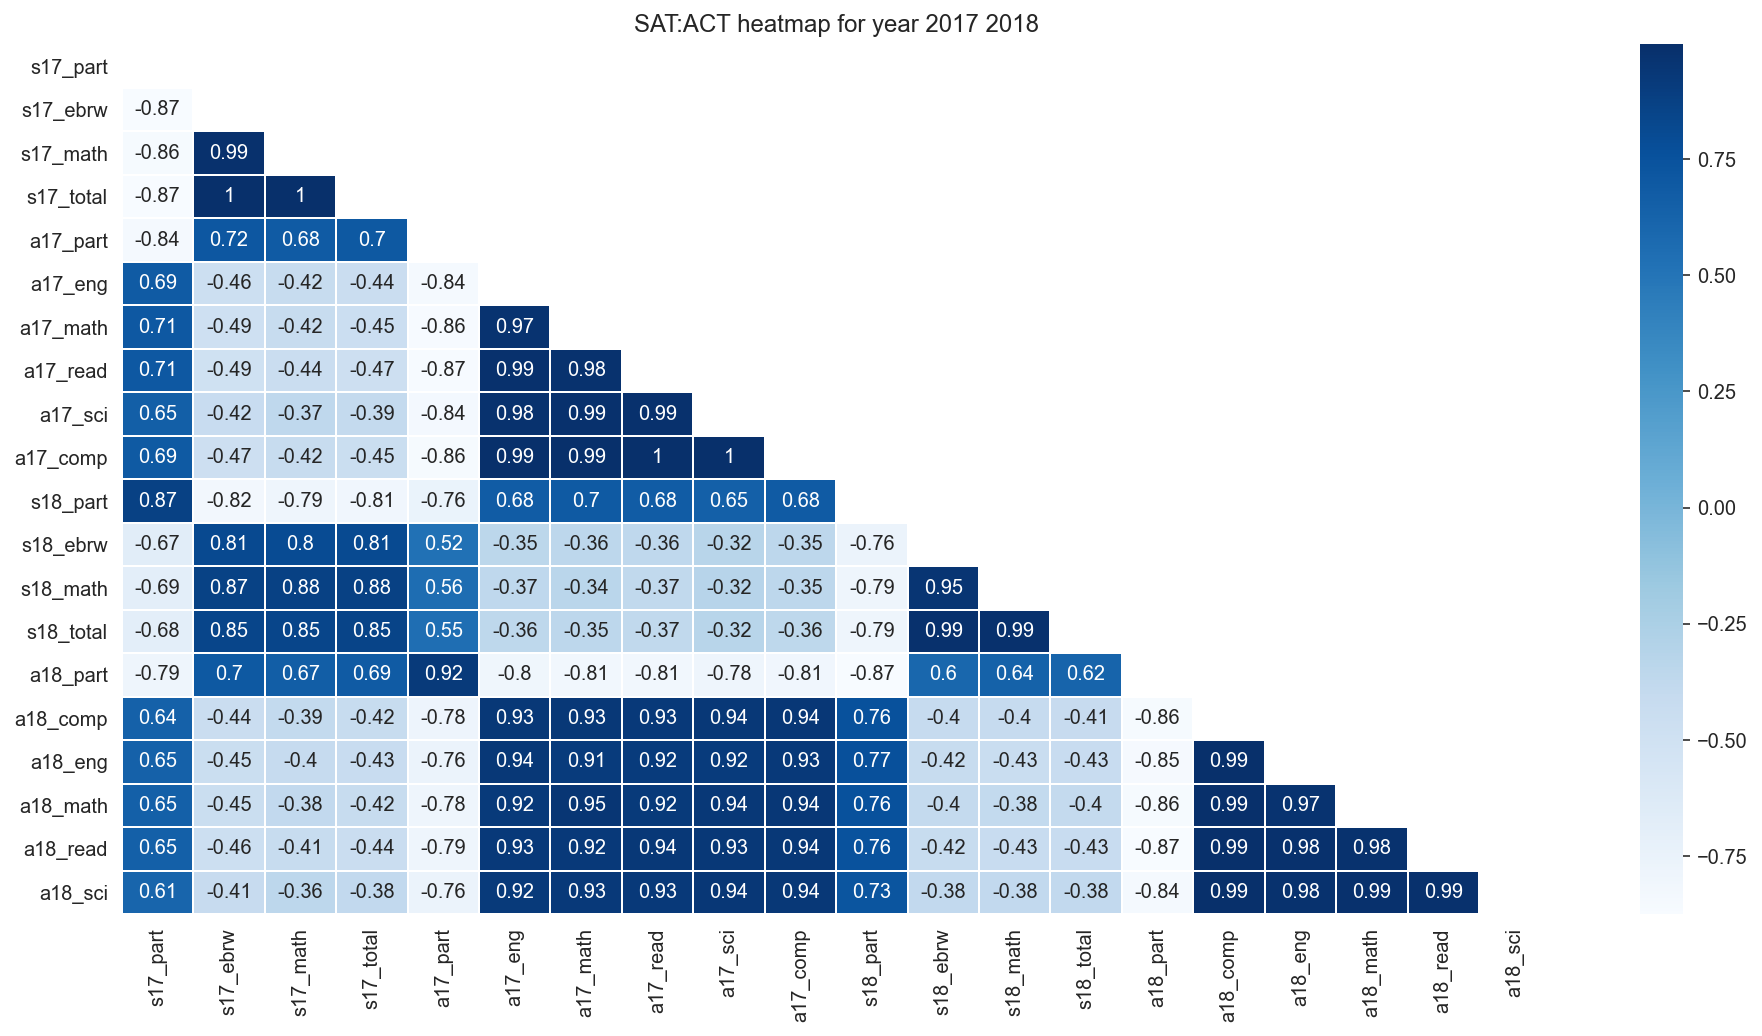

In [1030]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 8))
plt.title('SAT:ACT heatmap for year 2017 2018')

plot_hm = sns.heatmap(corr, cmap="Blues", mask=mask, linewidths=.5, annot=True);

plot_hm;

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1031]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])   # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(np.median(dataframe[column]), color='r', linestyle='solid', linewidth=2)
        ax[i].axvline(np.mean(dataframe[column]), color='k', linestyle='solid', linewidth=2)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

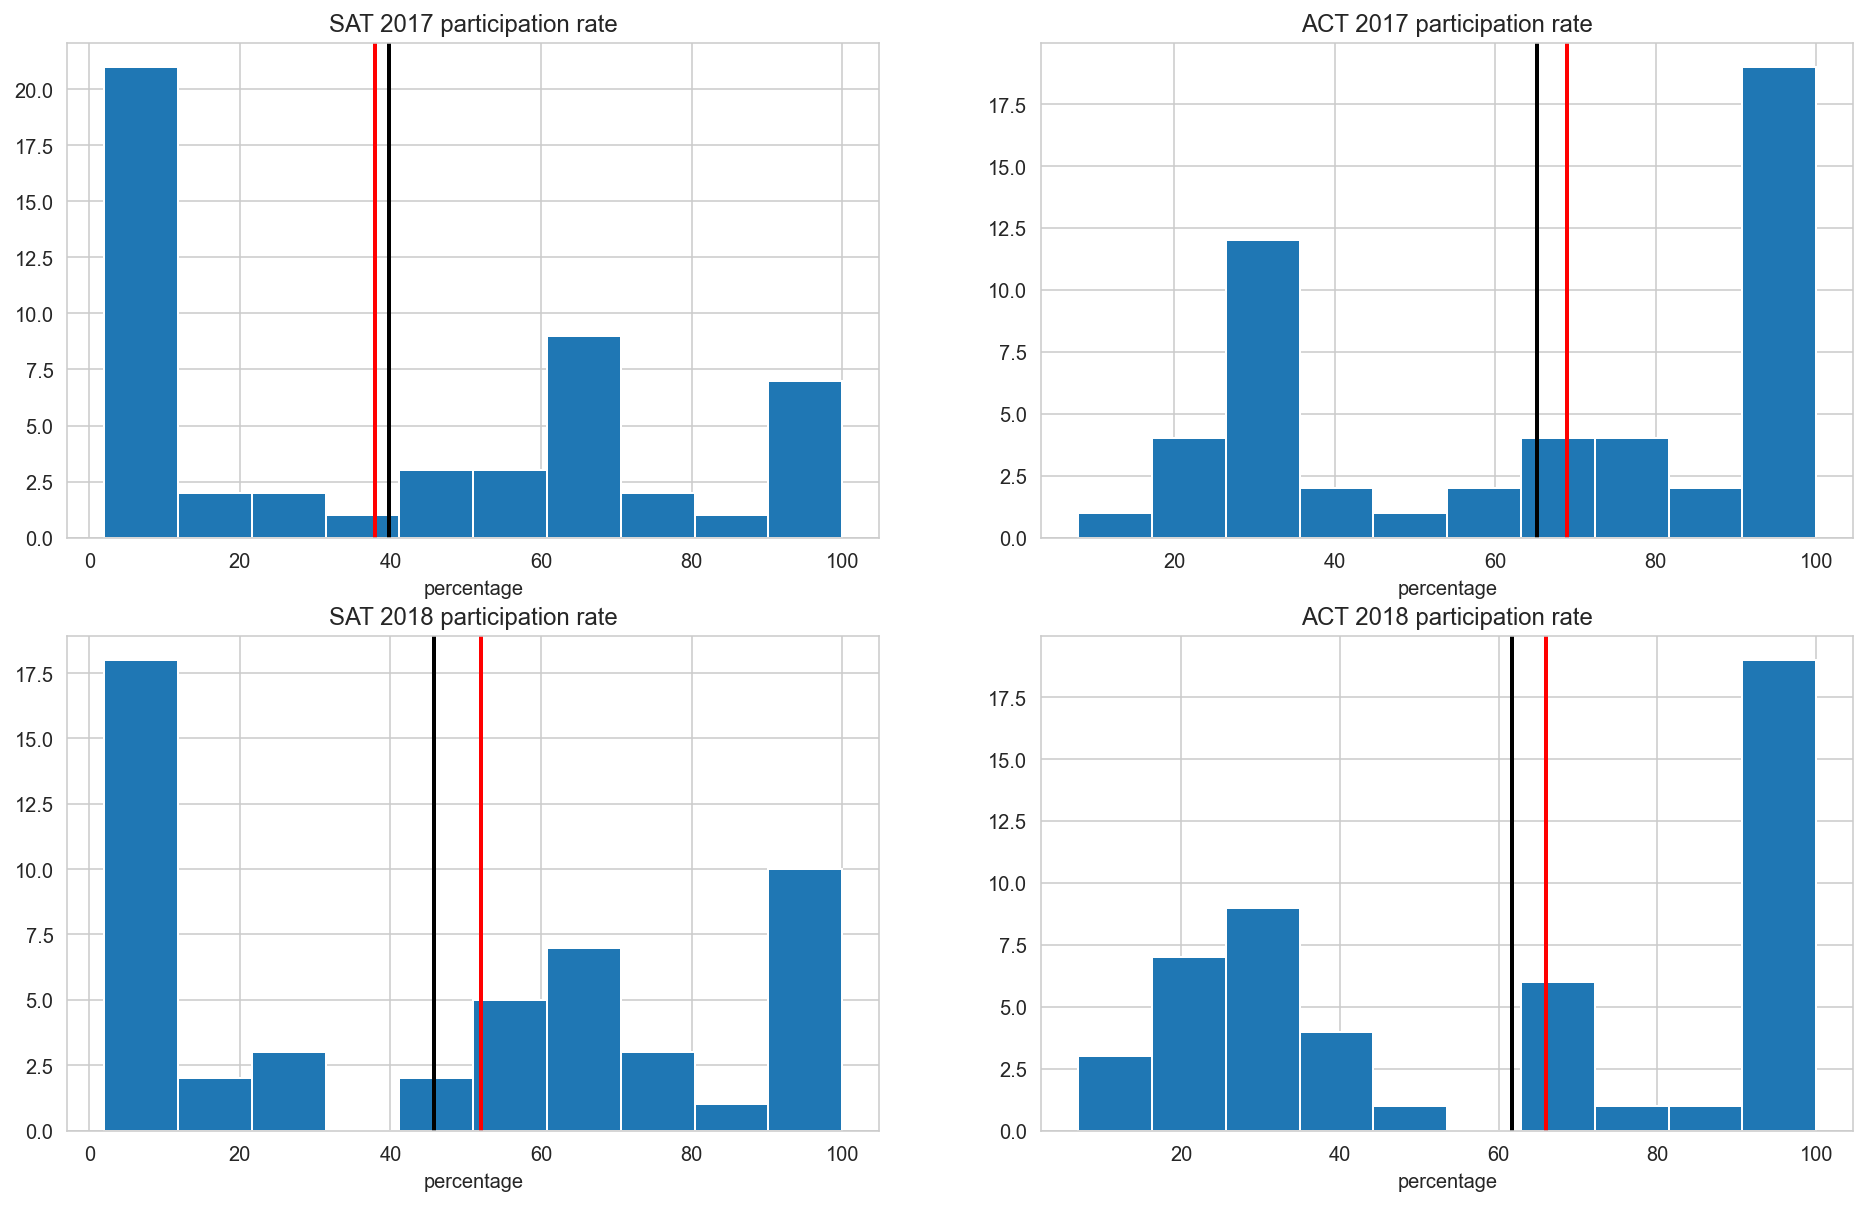

In [1032]:
# Code
column_hist = ['s17_part', 'a17_part', 's18_part', 'a18_part']
title_hist = ['SAT 2017 participation rate', 'ACT 2017 participation rate', 
              'SAT 2018 participation rate', 'ACT 2018 participation rate']
xlabels_hist = ['percentage', 'percentage', 'percentage', 'percentage']
subplot_histograms(df, column_hist, title_hist, xlabels_hist)


In [1033]:
#calculating the median of each test participation rate using numpy.
np.median(df['s17_part'])
np.median(df['s18_part'])
np.median(df['a17_part'])
np.median(df['a18_part'])

38.0

52.0

69.0

66.0

The red line represents the median participation rate for each test:
SAT 2017 = 38%, 
ACT 2017 = 69%, 
SAT 2018 = 52%, 
ACT 2018 = 66%.

The black line represent the mean participation rate for each test.

The general shape of all the distributions suggest that it is bimodal. The distributions suggest that the participation rate for SAT is conversely related to ACT.(Roughly a symmetrical image of each other) This will suggest states using the SAT exam may not be using the ACT exam in the same year. Based on 2017 and 2018 data and the median line, participation rate has increased for SAT exam on a year on year basis and decreased slightly for the ACT exam.

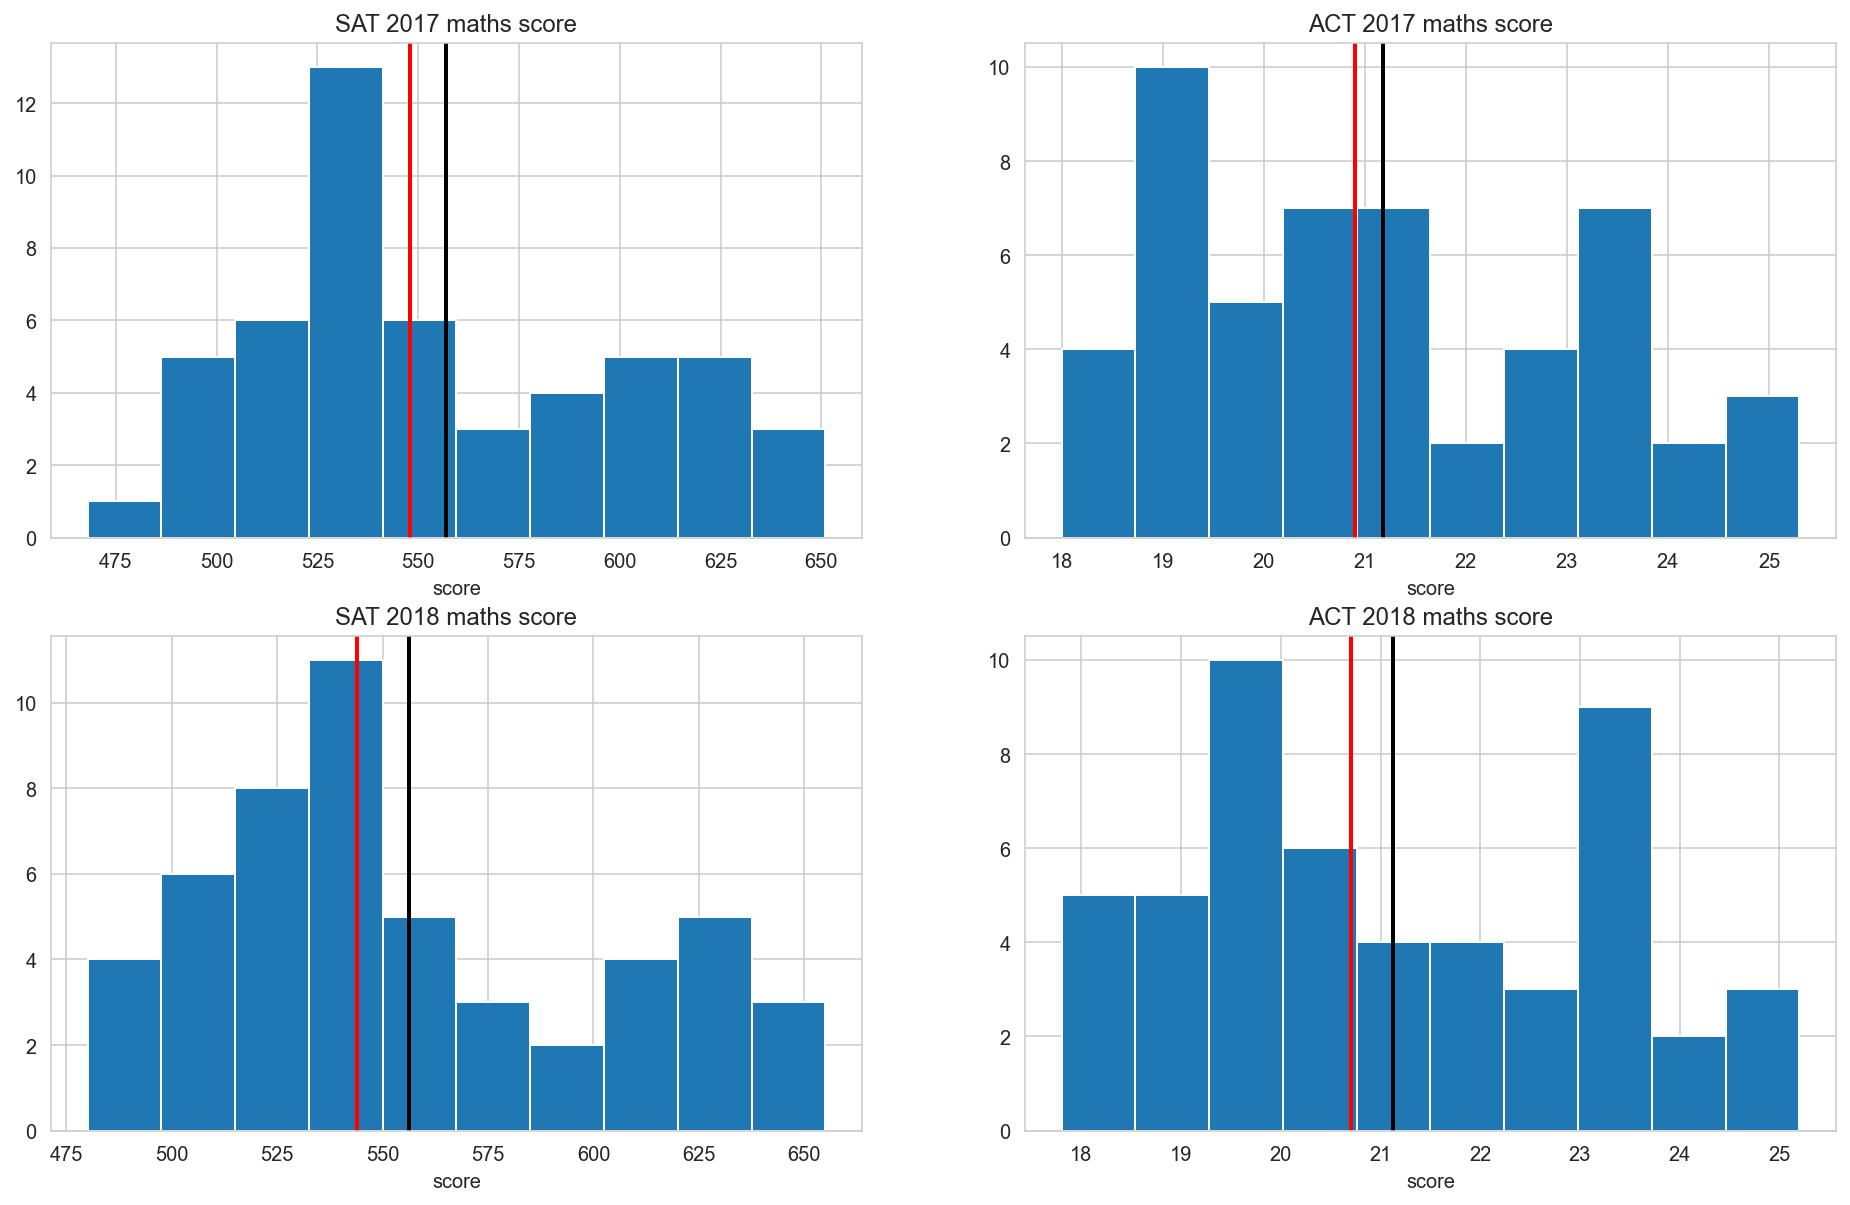

In [1034]:
column_hist = ['s17_math', 'a17_math', 's18_math', 'a18_math']
title_hist = ['SAT 2017 maths score', 'ACT 2017 maths score', 
              'SAT 2018 maths score', 'ACT 2018 maths score']
xlabels_hist = ['score', 'score', 'score', 'score']
subplot_histograms(df, column_hist, title_hist, xlabels_hist)

In [1035]:
#calculating the median of each test using numpy.
np.median(df['s17_math'])
np.median(df['a17_math'])
np.median(df['s18_math'])
np.median(df['a18_math'])

548.0

20.9

544.0

20.7

The red line represents the median math score for each test:
SAT 2017 = 548.0, 
ACT 2017 = 20.9, 
SAT 2018 = 544.0, 
ACT 2018 = 20.7.

The black line represents the mean math score for each test.

For both years 2017 and 2018, SAT math and ACT math both have distributions that were positively skewed.

However, both SAT math and ACT math median values have decreased slightly from 2017 to 2018.
The ACT Exam distributions seems to be bimodal.

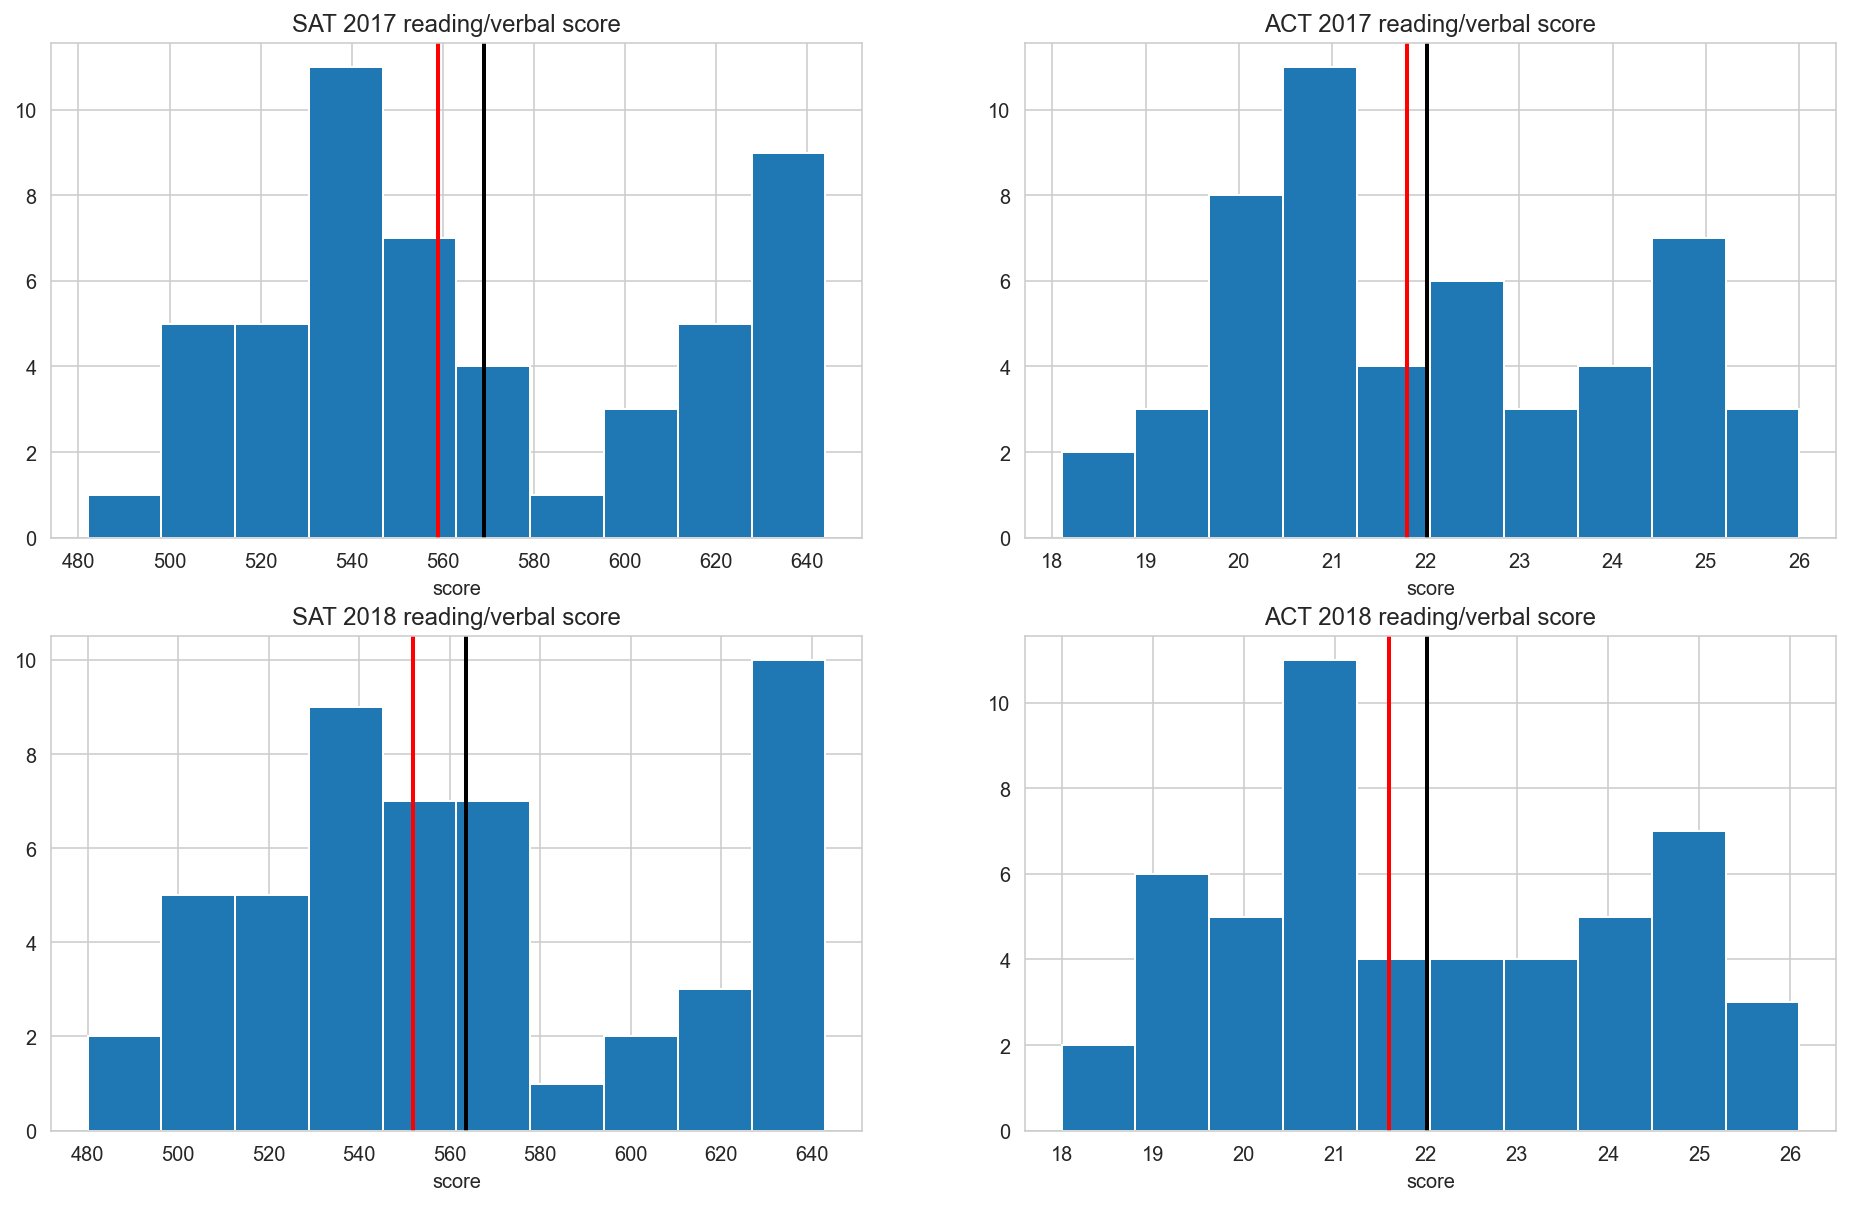

In [1036]:
column_hist = ['s17_ebrw', 'a17_read', 's18_ebrw', 'a18_read']
title_hist = ['SAT 2017 reading/verbal score', 'ACT 2017 reading/verbal score', 
              'SAT 2018 reading/verbal score', 'ACT 2018 reading/verbal score']
xlabels_hist = ['score', 'score', 'score', 'score']
subplot_histograms(df, column_hist, title_hist, xlabels_hist)

In [1037]:
#calculating the median of each test using numpy.
np.median(df['s17_ebrw'])
np.median(df['a17_read'])
np.median(df['s18_ebrw'])
np.median(df['a18_read'])

559.0

21.8

552.0

21.6

The red line represents the median reading/verbal score for each test:
SAT 2017 = 559.0, 
ACT 2017 = 21.8, 
SAT 2018 = 552.0, 
ACT 2018 = 21.6.

The black line represents the mean reading/verbal score for each test.

For 2017 SAT Evidence-based Reading and Writing exam and ACT reading exam, both distributions are generally similar (bimodal) and positively skewed.
The same explanation follows for 2018 SAT Evidence-based Reading and Writing exam and ACT reading exam.
However, both SAT Evidence-based Reading and Writing exam and ACT reading exam median values have decreased slightly from 2017 to 2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


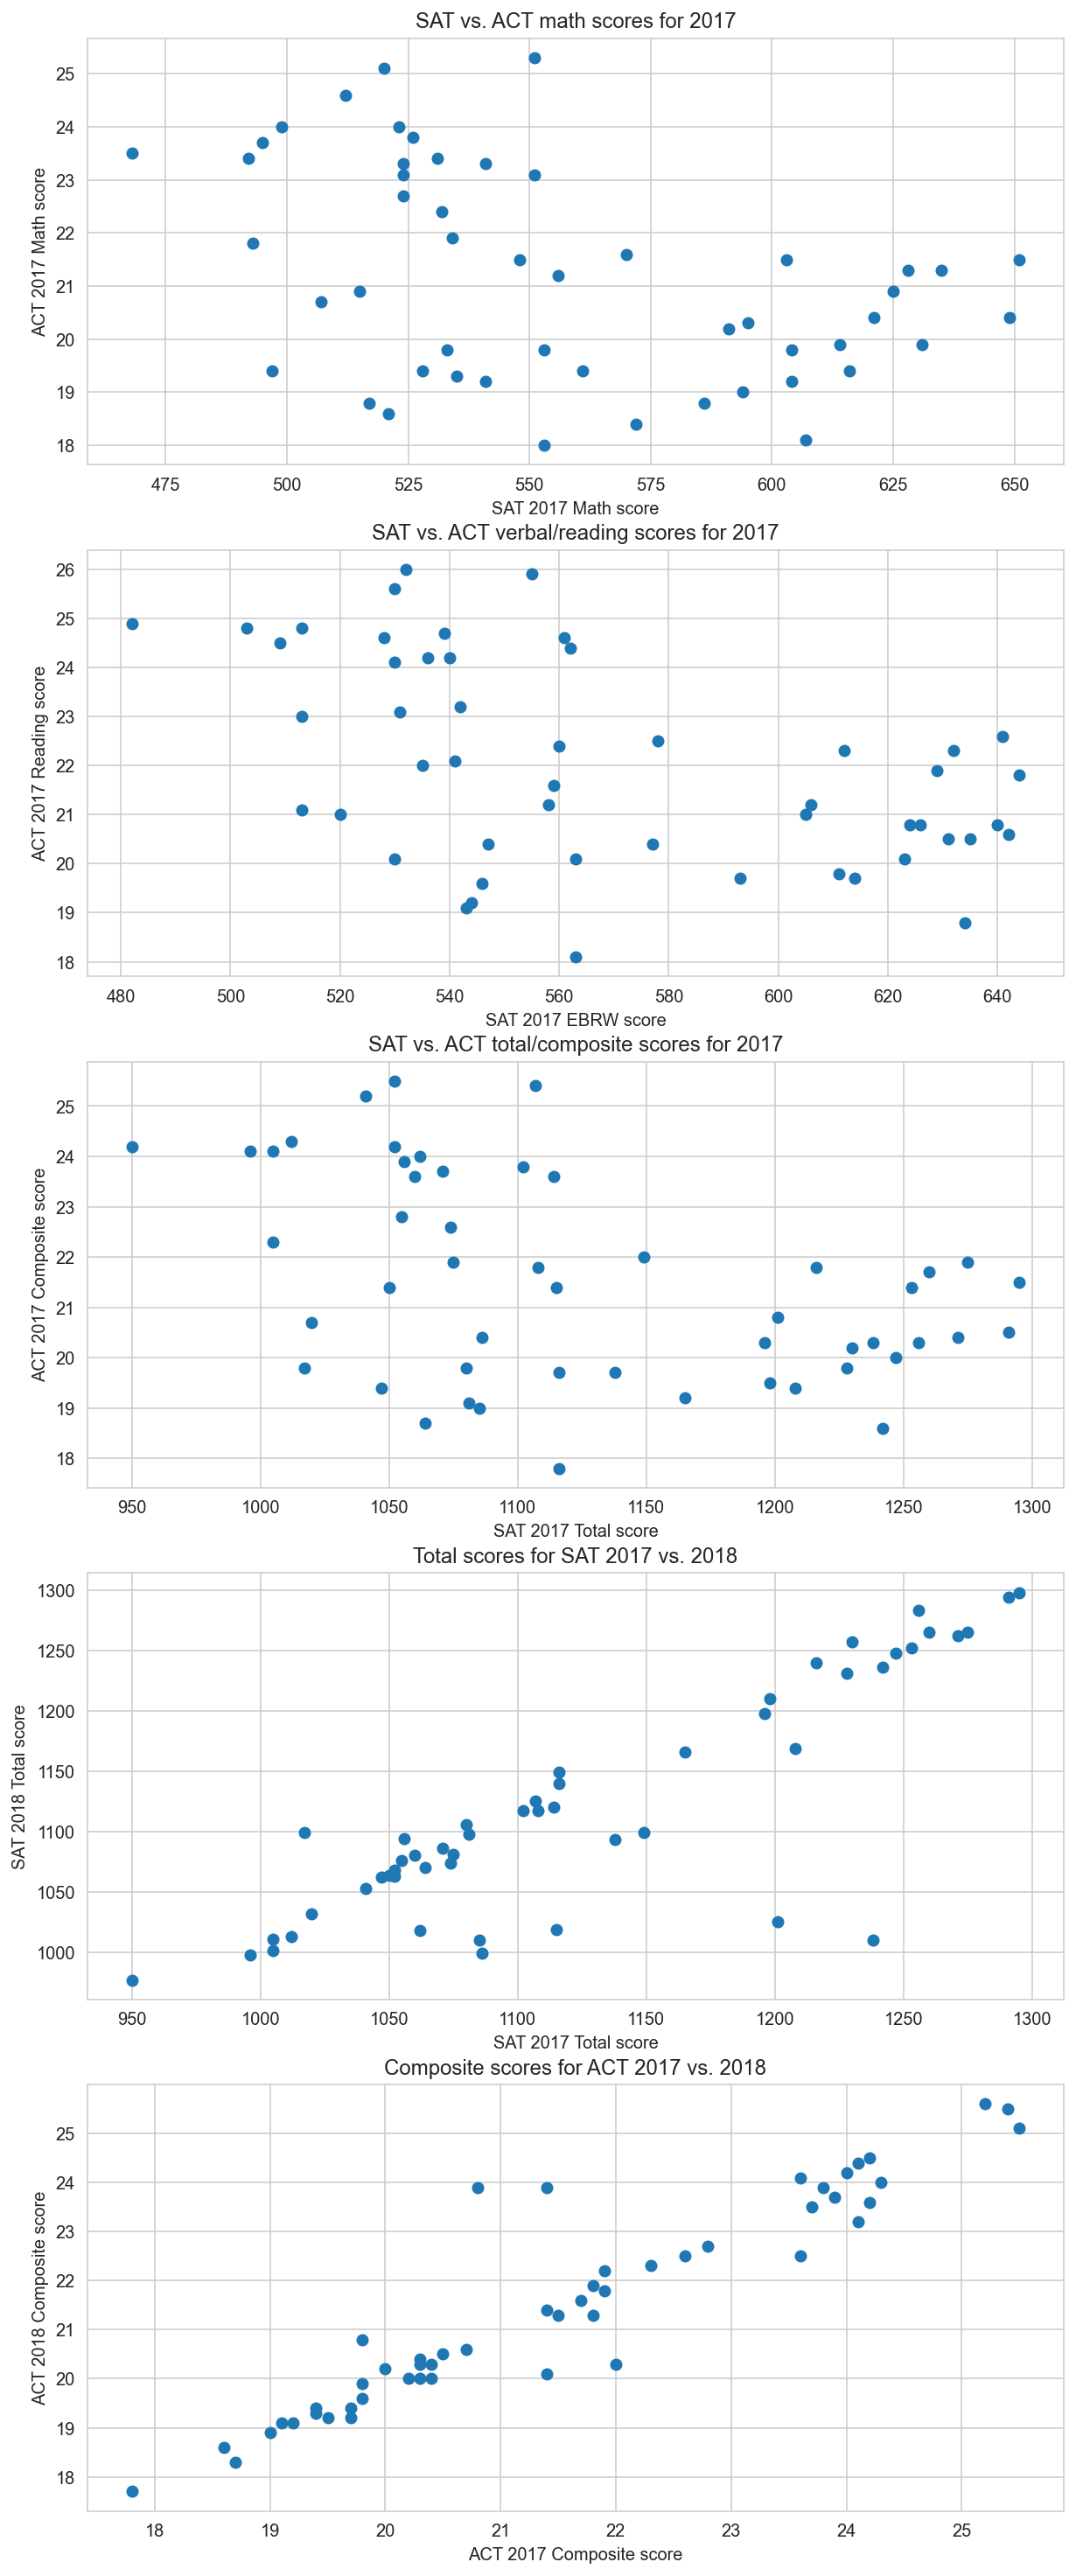

In [1038]:
# Code
fig, ax = plt.subplots(5, figsize=(10, 26))
ax[0].scatter(x = df['s17_math'], y = df['a17_math'])
ax[0].set_xlabel("SAT 2017 Math score")
ax[0].set_ylabel("ACT 2017 Math score")
ax[0].set_title("SAT vs. ACT math scores for 2017")

ax[1].scatter(x = df['s17_ebrw'], y = df['a17_read'])
ax[1].set_xlabel("SAT 2017 EBRW score")
ax[1].set_ylabel("ACT 2017 Reading score")
ax[1].set_title("SAT vs. ACT verbal/reading scores for 2017")

ax[2].scatter(x = df['s17_total'], y = df['a17_comp'])
ax[2].set_xlabel("SAT 2017 Total score")
ax[2].set_ylabel("ACT 2017 Composite score")
ax[2].set_title("SAT vs. ACT total/composite scores for 2017")

ax[3].scatter(x = df['s17_total'], y = df['s18_total'])
ax[3].set_xlabel("SAT 2017 Total score")
ax[3].set_ylabel("SAT 2018 Total score")
ax[3].set_title("Total scores for SAT 2017 vs. 2018")

ax[4].scatter(x = df['a17_comp'], y = df['a18_comp'])
ax[4].set_xlabel("ACT 2017 Composite score")
ax[4].set_ylabel("ACT 2018 Composite score")
ax[4].set_title("Composite scores for ACT 2017 vs. 2018")

plt.show();

For scatter plots 'SAT vs. ACT math scores for 2017' 'SAT vs. ACT verbal/reading scores for 2017'
and 'SAT vs. ACT total/composite scores for 2017',
all 3 plots have scatter points which are generally spaced out and suggests a weak negative correlation.

For scatter plots 'Total scores for SAT 2017 vs. 2018' and 'Composite scores for ACT 2017 vs. 2018',
the 2 plots have scatter points which are very close to each other and suggests a strong linear positive correlation. There are a few scatter points in the SAT total scores plot that are noticeable outliers such that
those states have mean SAT total scores higher in 2017 than in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

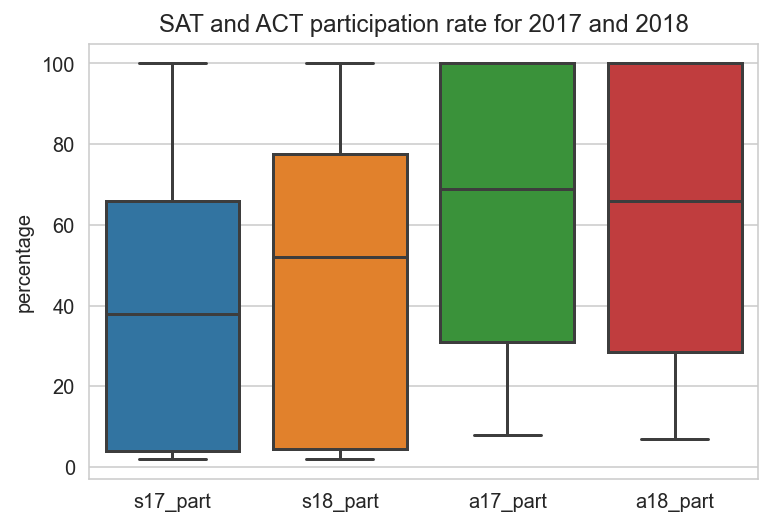

In [1039]:
# Code
sns.boxplot(data=df[['s17_part','s18_part','a17_part','a18_part']]).set(
    ylabel='percentage',
    title= "SAT and ACT participation rate for 2017 and 2018");

The interquartile range of SAT participation rate have increased due to the increase of the 75th quartile from 65% to near 80%. 

The interquartile range for ACT participation rate have increased slightly when the 25th percentile of about 35% have marginally decreased.

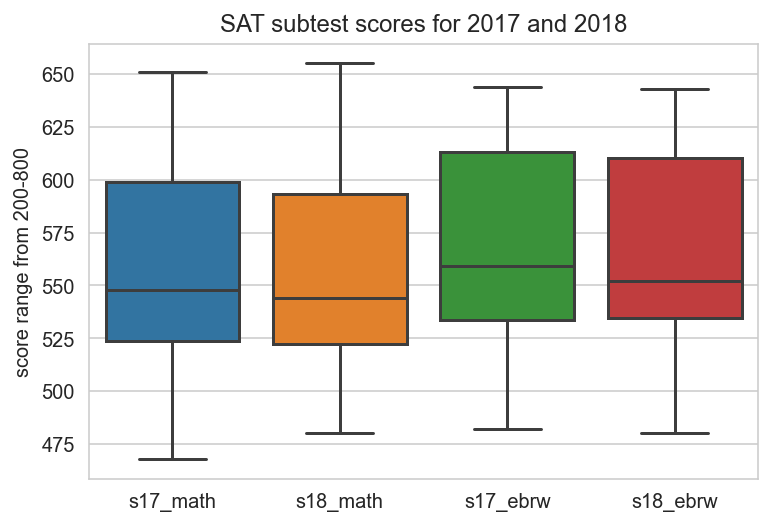

In [1040]:
sns.boxplot(data=df[['s17_math', 's18_math', 's17_ebrw', 's18_ebrw']]).set(
    ylabel='score range from 200-800', 
    title='SAT subtest scores for 2017 and 2018');

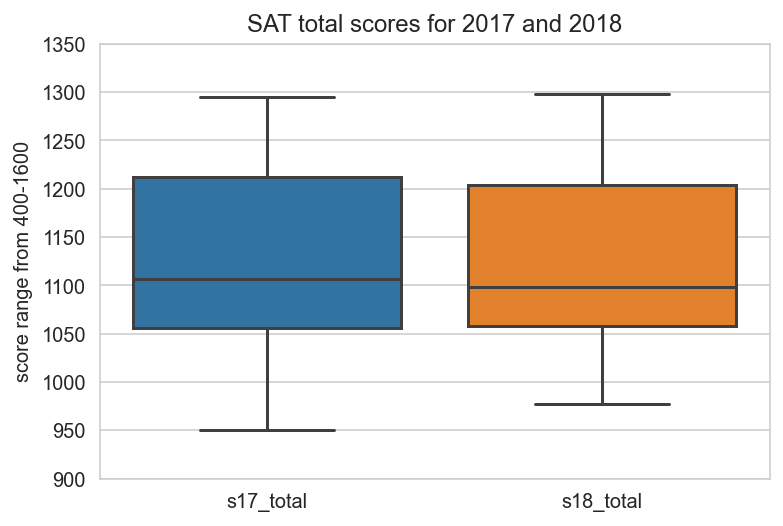

In [1041]:
sns.boxplot(data=df[['s17_total', 's18_total']]).set(ylim=(900, 1350), 
                                                                 ylabel='score range from 400-1600', 
                                                                 title='SAT total scores for 2017 and 2018');

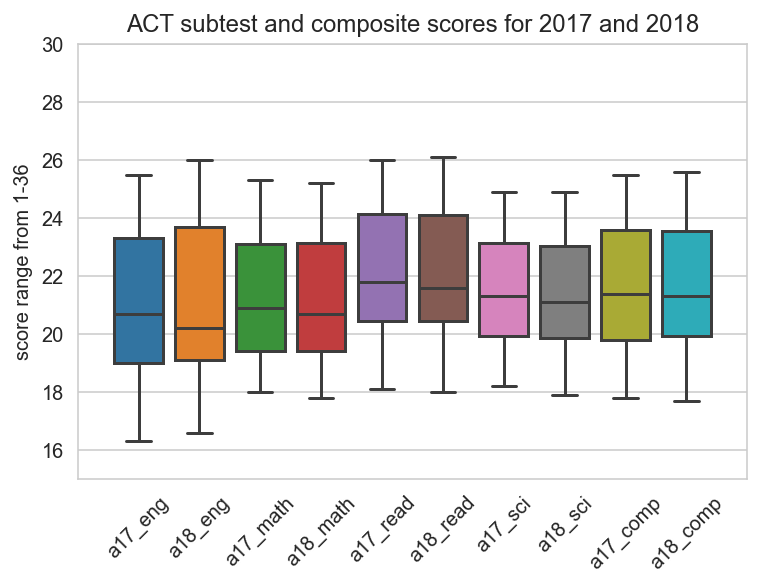

In [1042]:
sns.boxplot(data=df[['a17_eng', 'a18_eng', 'a17_math',
                     'a18_math', 'a17_read', 'a18_read',
                     'a17_sci', 'a18_sci', 'a17_comp', 
                     'a18_comp']]).set(
    ylim=(15, 30), 
    xlim=(-1, 10), 
    ylabel='score range from 1-36',
    title='ACT subtest and composite scores for 2017 and 2018');

locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [1043]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
s17_part,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
s17_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
s17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
s17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
a17_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
a17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
a17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
a17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
a17_sci,51.0,21.449020,1.737397,18.2,19.95,21.3,23.15,24.9
a17_comp,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [1044]:
df.skew(axis = 0, skipna = True)

s17_part     0.346450
s17_ebrw     0.272693
s17_math     0.365040
s17_total    0.310903
a17_part    -0.197989
a17_eng      0.352660
a17_math     0.332683
a17_read     0.269366
a17_sci      0.219649
a17_comp     0.319810
s18_part     0.136228
s18_ebrw     0.282300
s18_math     0.530407
s18_total    0.466432
a18_part    -0.021916
a18_comp     0.281962
a18_eng      0.371507
a18_math     0.269548
a18_read     0.201361
a18_sci      0.172383
dtype: float64

Answers:
(all figures rounded to 2 decimal place)


For s17_part and s18_part, the 2 participation rate have mean percentage rates of 39.8 and 45.75 respectively. 
s17_part and s18_part also have large standard deviation of 35.28 and 37.31 respectively.
The participation rate distribution became relatively less positively skewed from 2017 to 2018. This suggest that there were more states that have an increase in participation rates and higher than the mean participation rate for the SAT exams from 2017 to 2018.

For s17_ebrw, s17_maths, 18_ebrw and s18_math, all 4 test scores are positively skewed distributions with similar mean values and s17_math having the highest standard deviation of 84.91. SAT math test distribution have became relatively more positively skewed from 2017 to 2018 indicating that there was an increased in states that have maths score which are lower than the mean score. 

For s17_total and s18_total, the two total score distributions are positively skewed mean total score of 1126.1 and 1120.02 respectively. s17_total and s18_total standard deviation are 92.49 and 94.16 respectively.



For a17_part and a18_part, the 2 participation rate have mean percentage rates of 65.25 and 61.65 respectively. 
a17_part and a18_part also have relatively large standard deviation of 32.14 and 31.08 respectively as compared to the mean. The participation rate distribution became relatively less negatively skewed from 2017 to 2018 possibly due to more states having less participation rate in the ACT test from 2017 to 2018.

For a17_eng, a17_math, a17_read, a17_sci, a18_eng, a18_math, a18_read, a18_sci, all 8 test scores are positively skewed distributions with similar mean values. For ACT science test scores from year 2017 to 2018, the standard deviation decreased from 3.18 to 1.87. a17_sci have the highest standard deviation of 3.18. From 2017 to 2018, the skew of ACT science test score distribution became relatively less positive indicating that there were more states having science scores which were higher than the mean science score.

For a17_total and a18_total, the two total score distributions are positively skewed mean total score of 21.52 and 21.49 respectively. a17_total and a18_total standard deviation are 2.02 and 2.11 respectively.


Further interpretation from the histogram plots, all the variables are thus not normally distributed in view of the mean and median line and also the skew values which were greater or less than 0.
(Given that the mean value is greater or lesser than the median value, the variables above are not normally distributed)
(Distribution with skew value of 0 are normally distributed)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [1046]:
#using Fisher's Kurtosis for all states.
df.kurtosis(axis=1)

0     1.296027
1     1.328124
2     1.322401
3     1.305681
4     1.339280
5     1.540633
6     1.360149
7     1.359531
8     1.381617
9     1.406441
10    1.355258
11    1.393486
12    1.360500
13    1.412413
14    1.341180
15    1.286570
16    1.294211
17    1.292651
18    1.295813
19    1.339701
20    1.347537
21    1.354292
22    1.369257
23    1.293547
24    1.287622
25    1.291605
26    1.302684
27    1.290015
28    1.315699
29    1.351671
30    1.362357
31    1.320814
32    1.357672
33    1.349862
34    1.293247
35    1.336891
36    1.311037
37    1.326760
38    1.338263
39    1.357389
40    1.345164
41    1.302189
42    1.296249
43    1.348808
44    1.636831
45    1.340332
46    1.338759
47    1.333674
48    1.382314
49    1.289966
50    1.293231
dtype: float64

In [1047]:
#calculating the skew of each state
df.skew(axis=1)

0     1.532628
1     1.547630
2     1.545267
3     1.534509
4     1.550425
5     1.576258
6     1.547423
7     1.545374
8     1.551065
9     1.556845
10    1.551566
11    1.552806
12    1.546911
13    1.555157
14    1.550244
15    1.537025
16    1.538264
17    1.532967
18    1.533059
19    1.541107
20    1.550112
21    1.551433
22    1.548346
23    1.533968
24    1.531590
25    1.532877
26    1.534970
27    1.533811
28    1.536718
29    1.545997
30    1.552488
31    1.543873
32    1.552439
33    1.543470
34    1.533389
35    1.543552
36    1.533893
37    1.548476
38    1.548878
39    1.548616
40    1.541883
41    1.538648
42    1.533663
43    1.550652
44    1.590413
45    1.550573
46    1.549623
47    1.547927
48    1.555253
49    1.532880
50    1.532770
dtype: float64

We currently do not observe this trend. Based on the Fisher's Kurtosis, all states have a value of at least 1 whereas the Fisher's Kurtosis for a normally distributed data would be 0.Furthermore, the skew value of each state is positive indicating that the right tail of the distribution is longer than the left tail.
We also know that that there are some states that enforce 100% participation rate in one of the tests(SAT or ACT) and some states do not enforce 100% participation rate. Without a 100% participation rate from each country, samples drawn may not be representative of a particular score result.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The assumption holds true for all of the 3 variables.

Interpreting from the histogram plots above:

For Participation rate, ACT participation rate is negatively skewed while SAT participation rate is positively skewed.

For math scores, both ACT and SAT maths scores distributions are positively skewed with the mean score greater than the median score for both years in 2017 and 2018. 
 
For reading scores, both ACT and SAT maths scores distributions are positively skewed with the mean score greater than the median score for both years in 2017 and 2018.

Estimates made from these data may not be representative of the individual test score/population and will likely not be accurate for analysis.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does not make sense as state participation rate were based on students in high school taking the SAT or ACT exam or both. I think that the actual population are the students in the US taking SAT or ACT exams or both. Hence, it is not possible to conduct statistical inference if given these data specifically as students taking 2 test in the same one year period may result in some statistical inaccuracy in the data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: SAT and ACT maths are two seperate test forming 2 different variables.
It is not appropriate to compare and infer from both variables as each test have its own difficulty level. 

[The Transition from ACT to SAT as the Illinois College Entrance Exam and the Potential Implications on Student Scores in Mathematics](https://opus.govst.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1333&context=capstones)

With reference to the source, the mode of the delivery is different. The SAT math exam has a test section that does not allow calculators whereas the ACT math exam does not have the same section. Even though the math topic tested are similar, SAT maths questions and ACT maths questions are still different.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Investigating for a difference in the participating rate between SAT2017 and ACT2017 on a 5% confidence level.

H0 : there is no difference between the participating rate of SAT2017 and ACT2017.

HA : There is a difference between the participating rate of SAT2017 and ACT2017.

In [1048]:
# Code:
mean_a = df['s17_part'].mean()
mean_b = df['a17_part'].mean()
s_a = df['s17_part'].std()
s_b = df['s18_part'].std()
t_stat, pvalue = stats.ttest_ind_from_stats(mean_a, s_a, 51, mean_b, s_b, 51, equal_var=False)
(t_stat, pvalue)

(-3.5395777915789473, 0.0006106713183599643)

Conclusion based on hypothesis testing: Reject H0 and state that on a 5% confidence level, there is a significant difference between the participating rate of SAT2017 and ACT2017.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [1049]:
df[['state', 'a17_part', 'a18_part']][(df['a17_part'] == 100.0) & (df['a18_part'] != 100)]
# Colorado participation rate in ACT exam dropped significantly from 2017 to 2018

# filtering out states without 100% rate in the SAT exam
df[['state', 's17_part', 's18_part']][(df['s17_part'] != 100.0)]
# Illinois participation rate in the SAT exam increased significantly from 2017 to 2018

# filtering out states without 100% rate in the ACT exam
df[['state', 'a17_part', 'a18_part']][(df['a17_part'] != 100.0)]
#Ohio participation rate in the ACT exam increased from 75% in 2017 to 100% in 2018

,state,a17_part,a18_part
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0


,state,s17_part,s18_part
0,Alabama,5.0,6.0
1,Alaska,38.0,43.0
2,Arizona,30.0,29.0
3,Arkansas,3.0,5.0
4,California,53.0,60.0
5,Colorado,11.0,100.0
9,Florida,83.0,56.0
10,Georgia,61.0,70.0
11,Hawaii,55.0,56.0
12,Idaho,93.0,100.0


,state,a17_part,a18_part
1,Alaska,65.0,33.0
2,Arizona,62.0,66.0
4,California,31.0,27.0
6,Connecticut,31.0,26.0
7,Delaware,18.0,17.0
8,District of Columbia,32.0,32.0
9,Florida,73.0,66.0
10,Georgia,55.0,53.0
11,Hawaii,90.0,89.0
12,Idaho,38.0,36.0


Illinois

In 2018, Illinois switched from state-funded ACT exam to state-funded SAT exam for all schools in the state after
The College Board won the bid to the Illinois state contract. This boosted SAT exam participation rate drastically from 9% in 2017 to 99% in 2018.

[the-problem-with-illinois-new-mandatory-sat](https://www.noodlepros.com/blog/2017/04/05/the-problem-with-illinois-new-mandatory-sat/)

Colorado

The state government introduced a policy back in 2015 that required Colorado Department of Education to review 
college-entrance exams and take bids from college-entrance exam providers. The Colorado Department of Education decided to choose College Board SAT for their statewide college-entrance exam as it aligned better with their academic standards. Hence, this increased Colorado SAT exam participation rate from 11% in 2017 to 100% in 2018. 

[colorado-juniors-sat-college-exam](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)

Ohio

In 2018, the Ohio state government was the first state to fully subsidized the cost of the ACT exam for all students in a bid to grant disadvantaged students access to the exam. This have increased participation rate in the ACT exam from 75% in 2017 to 100% in 2018.

[historically-low-act-scores-red-flag-for-our-country](https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

SAT and ACT exam participation rate are inversely proportionate to their sub test scores. States tend to have higher scores with low participation rate and lower scores with high participation rate in their respective tests.
It is likely that states administering only ACT test have very high scores in SAT test as these students who attempted SAT exam were independent, confident and well-prepared.

SAT exam participation rate are inversely proportionate to ACT exam participation rate as some states have administered one of the two test for their high school students.

Most states with statewide participation rate in any exams were implented as such due to state policies. States would want to be accountable to all of their students and constantly seek reviews in their education sector. This includes reviewing exams and having competitive bids to companies to earn state contracts for it. The best exams would be ideally aligned to the state's education interest. Hence, we can see states changed from statewide ACT exams to the statewide newly revamped SAT exam.(post 2016)

In [1050]:
#Filtering states with less than 50% participation rate for the year 2018 and cross check with external sources if the states have 
#test requirements for their graduating seniors.

df[['state', 's18_part', 'a18_part']][(df['s18_part'] < 50.0) & (df['a18_part'] < 50.0)]

,state,s18_part,a18_part
1,Alaska,43.0,33.0
37,Oregon,48.0,42.0


In [1051]:
# Filtering Alaska participation rate for the 2 exams in 2017.
df[['state', 's17_part', 'a17_part']][(df['state'] == 'Alaska')]

,state,s17_part,a17_part
1,Alaska,38.0,65.0



Noted that Alaska have a total participation rate of 76% in either SAT or ACT exams in year 2018.
From 2017 to 2018, Alaska had a 32% decrease in ACT exam participation rate. However this only translated to a 
less than proportionate increase in SAT exam participation rate in that same year.(5% increase)
 
Hence, there may be a significant number of students in Alaska who did not take ACT or SAT exams.
Further noted from external sources that The Alaska state government currently do not administer ACT or SAT exams.
[which-states-require-students-to-take-the-sat-or-act](https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act)
This provides an opportunity for CollegeBoard to introduce ideas to raise SAT participation rates in Alaska.

Recommendation

To increase participation rate in SAT exam, we can suggest to the Alaska state government to make SAT part of their high school curriculum test. With regards to the cost of the SAT exam, Collegeboard can introduce subsidies to the schools. Students would be able to take the SAT exam for free if it was part of their high school curriculum test.
To further encourage participation in the SAT exam. Collegeboard can also offer free online PSAT and SAT exam resources to junior high school students from Alaska. PSAT exam is a preliminary exam which is easier in difficulty as compared to the SAT exam. This will help students to be conditioned to the difficulty of the SAT exam in their senior year. 

Additional data
we can obtain data of ACT and SAT exam before year 2017 to further substantiate our findings.
It will be valuable to understand the participation rate of the SAT and ACT exam before the new format of the SAT exam.